# Тема “Обучение с учителем”

## Задание 1

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте
датафреймы X и y из этих данных.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [8]:
boston = load_boston()
data = boston["data"]

feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

r2_score(y_pred, y_valid)

0.6693702691495629

## Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля
sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42)

rf.fit(X_train, y_train.values[:, 0])

y_pred = rf.predict(X_valid)
r2_score(y_pred, y_valid)

0.849267762144257

**R2_score:**

LinearRegression - 0.67

RandomForestRegressor - 0.85 **(значение выше, предсказания точнее)**

## *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [10]:
?rf.feature_importances_

Type:        property
String form: <property object at 0x7f034b404ea0>
Docstring:  
The impurity-based feature importances.

The higher, the more important the feature.
The importance of a feature is computed as the (normalized)
total reduction of the criterion brought by that feature.  It is also
known as the Gini importance.

high cardinality features (many unique values). See
:func:`sklearn.inspection.permutation_importance` as an alternative.

Returns
-------
feature_importances_ : ndarray of shape (n_features,)
    The values of this array sum to 1, unless all trees are single node
    trees consisting of only the root node, in which case it will be an
    array of zeros.


In [11]:
print('Сумма всех показателей важности:')
rf.feature_importances_.sum()

Сумма всех показателей важности:


1.0

In [12]:
print('Два наиболее важных параметра:')
pd.DataFrame(rf.feature_importances_, index=rf.feature_names_in_).sort_values(0, ascending=False)[:2]

Два наиболее важных параметра:


,0
LSTAT,0.415129
RM,0.402201


## *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию
по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать
задачу классификации - будем определять,какие из транзакциции по кредитной карте являются
мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества
относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать
лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка
несбалансирована.

<AxesSubplot:>

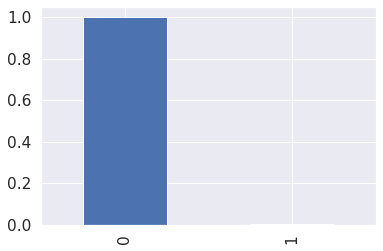

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('creditcard.csv')
df['Class'].value_counts(normalize=True).plot(kind="bar")

Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет
ли в них пропусков.

In [14]:
# зачем info, если есть dtypes?
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [15]:
# пустых значений нет
df.isnull().values.any()

False

Примените следующую настройку, чтобы можно было просматривать все столбцы
датафрейма:

pd.options.display.max_columns = 100.

Просмотрите первые 10 строк датафрейма df.

In [16]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split,
используя аргументы: test_size=0.3, random_state=100, stratify=y.

У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

In [17]:
X = df.copy()
y = X.pop('Class')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=100)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (199364, 30)
X_test.shape = (85443, 30)
y_train.shape = (199364,)
y_test.shape = (85443,)


Для поиска по сетке параметров задайте такие параметры:

```Python
parameters = [{'n_estimators': [10, 15],
            'max_features': np.arange(3, 5),
            'max_depth': np.arange(4, 7)}]
```

Создайте модель GridSearchCV со следующими аргументами:

```Python
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
```

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и
запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных,
используя в качестве аргументов массивы y_test и y_pred_proba.

In [18]:
parameters = {
    'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='accuracy')

In [19]:
clf.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 15}

In [20]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9517587213217085

# *Дополнительные задания:

Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
переменную data.

Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
содержащий ее ключи.

In [21]:
from sklearn.datasets import load_wine
wine = load_wine()
data_keys = list(wine)
data_keys

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д.4).

In [22]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.

In [23]:
wine['target_names'] # всего 3 класса

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
создайте датафрейм под названием X.

Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
Название поля - 'target'.

Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
X_corr.

In [24]:
X = pd.DataFrame(wine['data'])
print(f'X.shape = {X.shape}')
print(f'Есть ли пустые значения: {"есть" if df.isnull().values.any() else "нет"}')

X.shape = (178, 13)
Есть ли пустые значения: нет


In [81]:
X['target'] = wine['target']

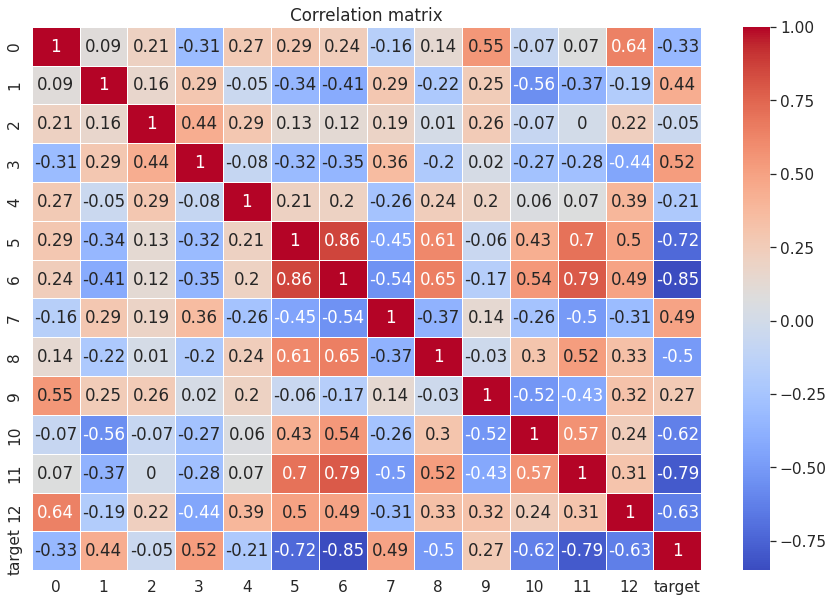

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = X.corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [75]:
high_corr = corr_matrix[np.abs(corr_matrix) > 0.5]['target'][corr_matrix.index != 'target'].dropna().index.to_list()

high_corr

[3, 5, 6, 10, 11, 12]

Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.

In [82]:
X = X.drop('target', axis=1)
X[[f'{col}_2' for col in high_corr]] = X[high_corr]**2
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,3_2,5_2,6_2,10_2,11_2,12_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,420.25,2.8224,0.3721,0.4096,3.0276,547600.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,529.00,3.2400,0.5625,0.4900,2.4336,562500.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,400.00,2.5281,0.4761,0.3481,2.4336,697225.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,400.00,2.7225,0.4624,0.3600,2.6244,705600.0


Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.

In [84]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,3_2,5_2,6_2,10_2,11_2,12_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
